In [1]:
#Scritti da IA vs Umani


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from wordcloud import WordCloud, STOPWORDS
import re  #espressioni regolari
import spacy #lemmizzazione preaddestrata
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df = pd.read_csv("../datasets/AI_Human.csv")
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [4]:
print(df.isnull().sum())
print(df.duplicated().sum())
print(df['generated'].value_counts())

text         0
generated    0
dtype: int64
0
generated
0.0    305797
1.0    181438
Name: count, dtype: int64


In [5]:
#estraiamo un campione di N+N righe con generated=0 e generated=1
N = 30000
d0 = df[df['generated'] == 0].sample(n=N).copy()
d1 = df[df['generated'] == 1].sample(n=N).copy()
data = pd.concat([d0,d1], ignore_index=True)

In [6]:
def create_wordcloud(data, column, title):
  all_text = " ".join(data[column])
  wc = WordCloud(stopwords = STOPWORDS).generate(all_text)
  plt.figure(figsize = (7,4))
  plt.imshow(wc)
  plt.title(f'Word Cloud for {column} in {title}', fontsize=16, color='black')
  plt.axis('off')
  plt.show()

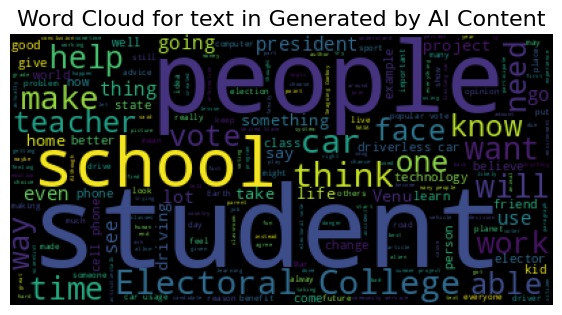

In [7]:
create_wordcloud(d0, 'text', 'Generated by AI Content')

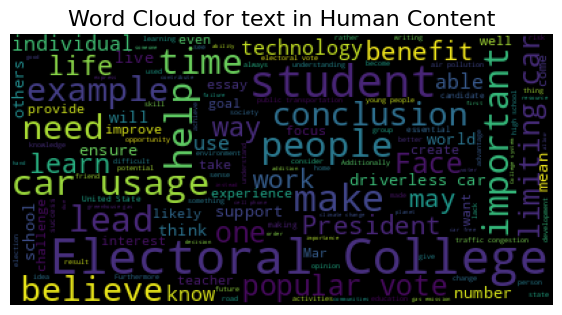

In [8]:
create_wordcloud(d1, 'text', 'Human Content')

In [9]:
#lemmizzatore professionale
nlp = spacy.load("en_core_web_sm")

In [10]:
# visualizzazione statistiche sui dati
print("Classi disponibili:", np.unique(data["generated"].values))
len_voc = len(np.unique(np.hstack(data["text"].values)))
print("Numero di parole uniche:", len_voc)
print('')
length = [len(i) for i in data["text"].values]
len_med = int(np.mean(length))
dvs = round(np.std(length))
print("Lunghezza media di un testo:", len_med)
print("Deviazione standard sulla lunghezza media:", dvs)
print("Lunghezza massima testo", np.max(length))

Classi disponibili: [0. 1.]
Numero di parole uniche: 60000

Lunghezza media di un testo: 2245
Deviazione standard sulla lunghezza media: 958
Lunghezza massima testo 11641


In [11]:
def preprocess_text(txt:str):
    
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = txt.lower()
    txt = " ".join(txt.split())
    
    doc = nlp(txt)
    
    tokens_filtered = []
    
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
            
        tokens_filtered.append(token.lemma_)
        
    return " ".join(tokens_filtered)

In [12]:
#data['prep_text'] = data['text'].apply(preprocess_text) # fase di generazione del testo rielaborato con la funzione preprocess_text
#data.head()

In [13]:
#returnValue = data.to_csv("myfile.csv", mode='w') # salvataggio su file del dataframe elaborato

In [14]:
data = pd.read_csv("myfile.csv")
data.dropna(inplace=True)
data['len'] = data['text'].apply(len)
data['word'] = data['text'].apply(lambda x: len(str(x).split()))
data['prep_len'] = data['prep_text'].apply(len)
data['prep_word'] = data['prep_text'].apply(lambda x: len(str(x).split()))

In [15]:
from matplotlib.font_manager import FontProperties
def visualize_text_data(data, title, lung, parole):
    
    # Create a figure with a larger size
    plt.figure(figsize=(16, 8))

    # Define a custom font with a nice appearance
    custom_font = FontProperties(family='serif', style='normal', size=14, weight='bold')

    # First subplot for text length distribution
    plt.subplot(1, 2, 1)
    n, bins, patches = plt.hist(data[lung], bins=10, color='mediumaquamarine', edgecolor='black', alpha=0.5, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Lunghezza testo", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequenza", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Distribuzione della lunghezza del testo per {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        plt.text(bin_val+100, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Second subplot for word count distribution
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(data[parole], bins=10, color='violet', edgecolor='black', alpha=0.7, label='News Article')
    plt.grid(linestyle='--', alpha=0.6)
    plt.xlabel("Numero parole", fontsize=10, fontproperties=custom_font, color='black')
    plt.ylabel("Frequenza", fontsize=10, fontproperties=custom_font, color='black')
    plt.title(f'Distibuzione del numero di parole per {title}', fontsize=12, fontproperties=custom_font, color='black')

    # Annotate the plot with bin values (vertical text)
    for bin_val, freq in zip(bins, n):
        
        plt.text(bin_val+20, freq+20, f'{int(freq)}', ha='left', va='baseline', fontsize=12, fontproperties=custom_font)

    # Adjust the layout for subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage:
# visualize_text_data(your_data_frame, "Your Title")

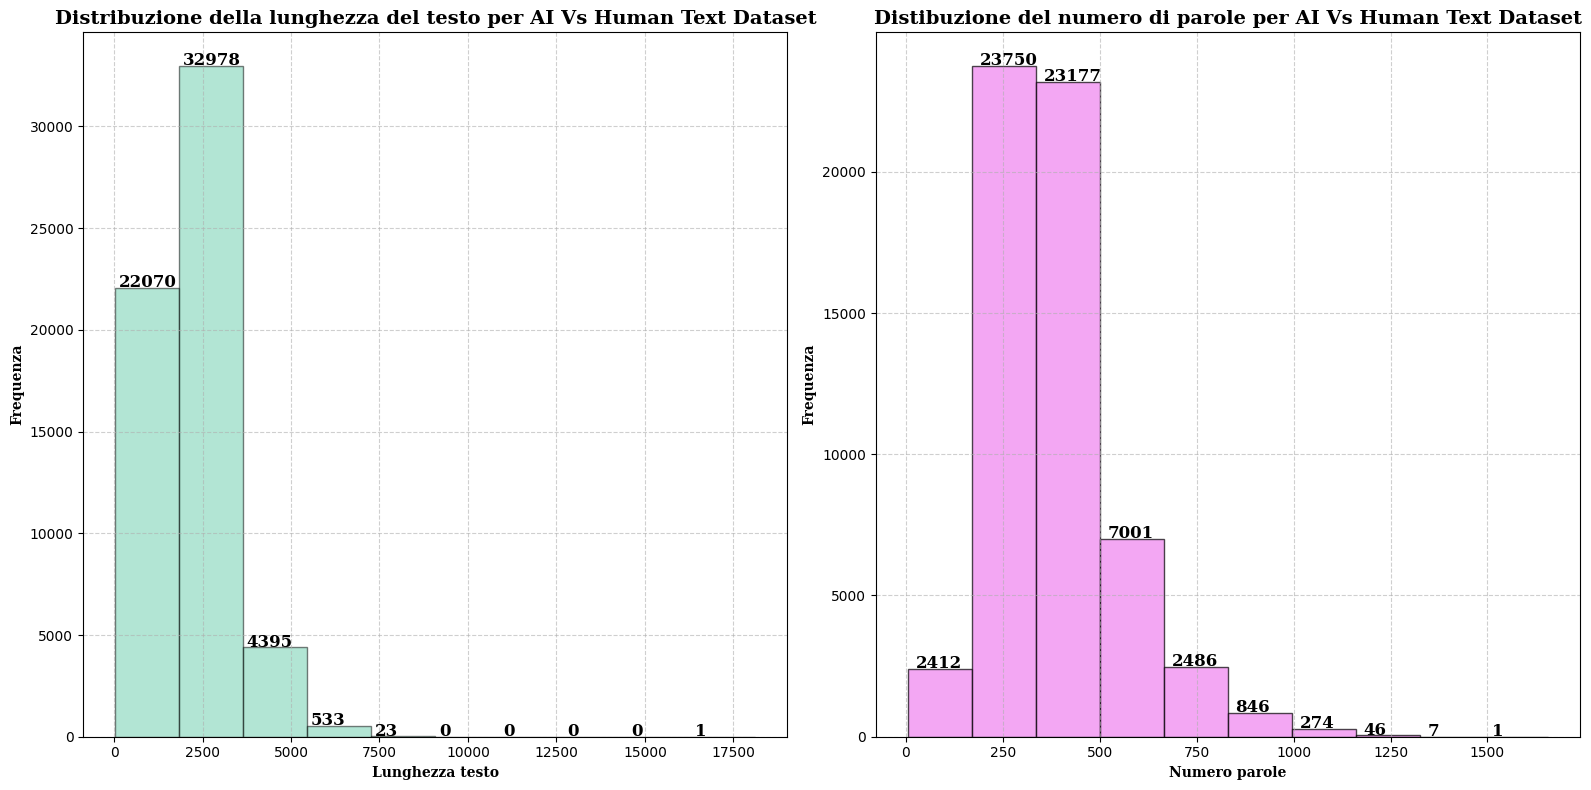

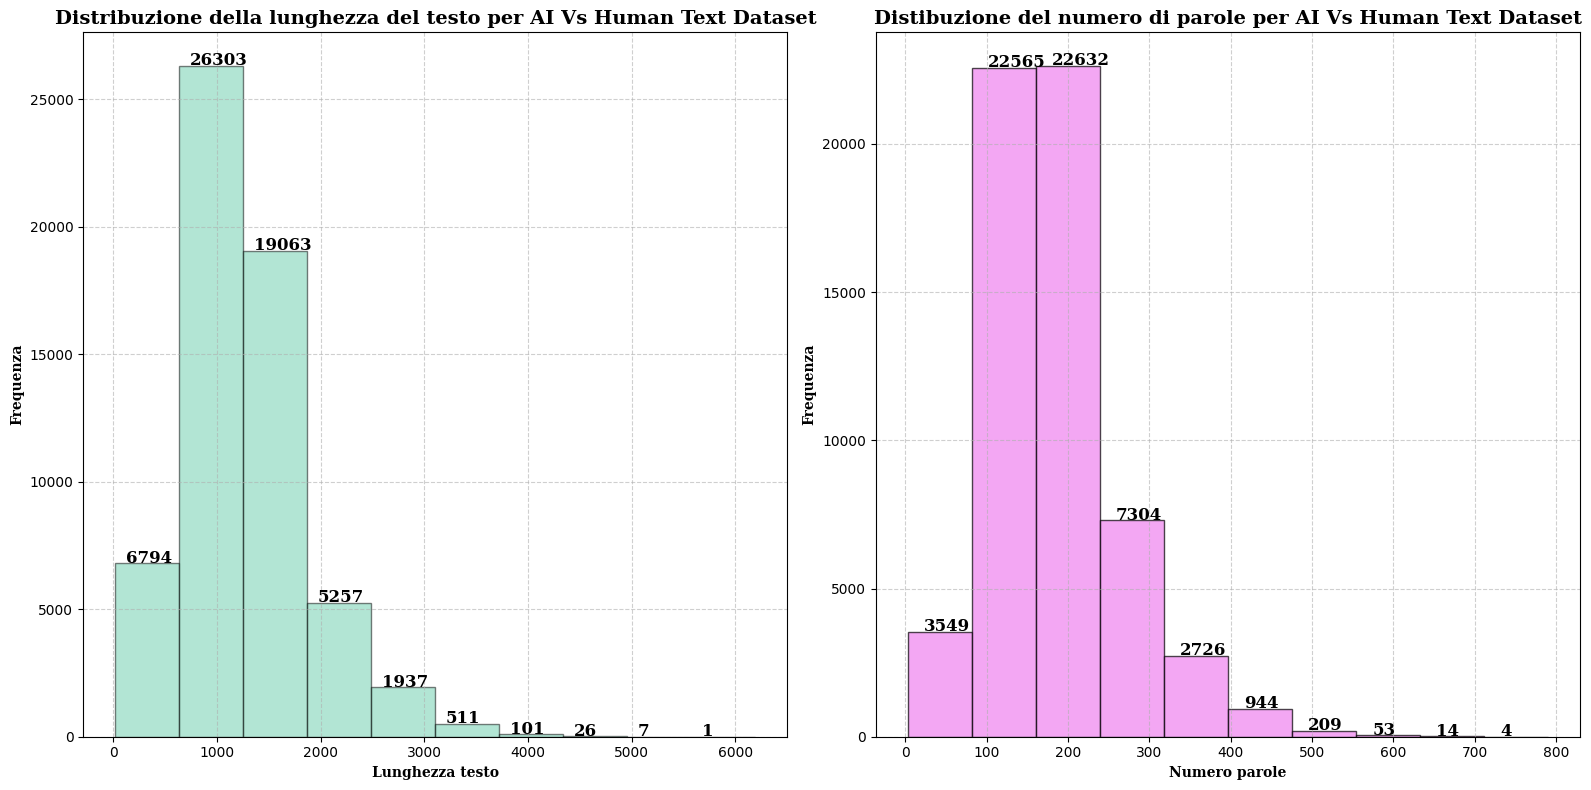

In [16]:
visualize_text_data(data, 'AI Vs Human Text Dataset', 'len', 'word')
visualize_text_data(data, 'AI Vs Human Text Dataset', 'prep_len', 'prep_word')

In [17]:
data = data.drop(["text"], axis=1)
d0 = data[data['generated'] == 0].copy()
d1 = data[data['generated'] == 1].copy()

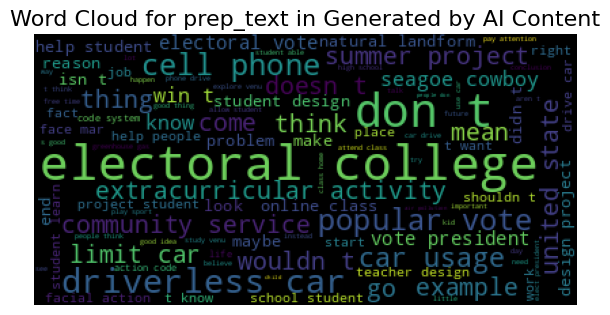

In [18]:
create_wordcloud(d0, 'prep_text', 'Generated by AI Content')

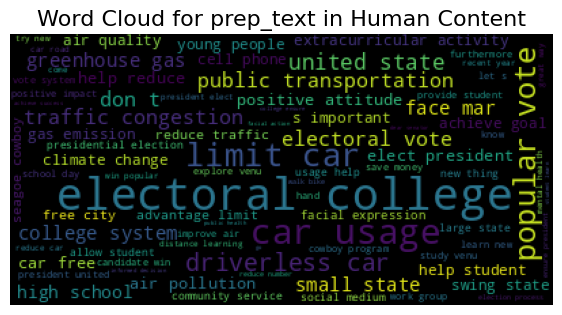

In [19]:
create_wordcloud(d1, 'prep_text', 'Human Content')

In [20]:
# visualizzazione statistiche sui dati
print("Classi disponibili:", np.unique(data["generated"].values))
len_voc = len(np.unique(np.hstack(data["prep_text"].values)))
print("Numero di parole uniche:", len_voc)
print('')
word_med = int(data['prep_word'].mean())
length = [len(i) for i in data["prep_text"].values]
len_med = int(np.mean(length))
dvs = round(np.std(length))
print("Numero medio di parole nel testo:", word_med)
print("Numero massimo di parole nel testo:", data['prep_word'].max())
print("Lunghezza media di un testo:", len_med)
print("Deviazione standard sulla lunghezza media:", dvs)
print("Lunghezza massima testo", np.max(length))

Classi disponibili: [0. 1.]
Numero di parole uniche: 59080

Numero medio di parole nel testo: 182
Numero massimo di parole nel testo: 790
Lunghezza media di un testo: 1264
Deviazione standard sulla lunghezza media: 589
Lunghezza massima testo 6196


In [21]:
# preparazione dataset
#sc = StandardScaler()
#X = data[['prep_text','len','word']]
X = data['prep_text']
y = data['generated']
#num_max = len_med+2*dvs  # numero di parole che saranno realmente utilizzate nel modello
num_max = int(len_med*1.2)
ff_dim1 = int(num_max*0.9)
ff_dim2 = int(ff_dim1/2)
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = SEED, stratify = y)

vect_ = TfidfVectorizer(max_features=(num_max))
#vect_ = Tokenizer(num_words=len_voc, filters='')
#vect_.fit_on_texts(X_train)
#XV = vect_.texts_to_sequences(X_train)
#xv = vect_.texts_to_sequences(X_test)
XV = vect_.fit_transform(X_train)
xv = vect_.transform(X_test)
##XT = X_train.drop(["prep_text"], axis=1).values
##XT = np.asarray(X_train.drop(["prep_text"], axis=1), dtype=np.float32)
##xt = np.asarray(X_test.drop(["prep_text"], axis=1), dtype=np.float32)
##xt = X_test.drop(["prep_text"], axis=1).values
##XT = sc.fit_transform(XT)
##xt = sc.transform(xt)
XV = XV.toarray()
xv = xv.toarray()
#num_ft = XT.shape[1]
#XV = pad_sequences(XV, maxlen=num_max, padding='post')
#xv = pad_sequences(xv, maxlen=num_max, padding='post')

In [22]:
print("Numero di features XV:",XV[345])
#print("Numero di features XT:", XT.shape)

Numero di features XV: [0. 0. 0. ... 0. 0. 0.]


In [23]:
# rete neurale "dense" come primo modello
K.clear_session()

def get_simple_model():
    # modello 1
    model = Sequential()
    model.add(Dense(ff_dim1, activation='relu', input_shape=(num_max,)))
    model.add(Dense(ff_dim2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    '''
    # modello 2   
    inputs1 = layers.Input(shape=(num_max,)) 
    inputs2 = layers.Input(shape=(num_ft,))
    x1 = layers.Dense(1024, activation='relu')(inputs1)
    x2 = layers.Dense(512, activation='relu')(x1)
    x3 = layers.Dense(4, activation='relu')(inputs2)                      
    conc = layers.Concatenate(axis=-1)([x2, x3]) 
    x4 = layers.Dense(256, activation='relu')(conc)
    output = layers.Dense(1, activation='sigmoid')(x4)
    model = keras.Model(inputs=[inputs1, inputs2], outputs=output)
    '''
   
    model.summary()
    model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
    print('- modello compilato -')
    return model

def check_model(model,x,y,xt,yt,epoche=10):
    return model.fit(x,y,batch_size=512,epochs=epoche,verbose=2,validation_data=(xt, yt))

m = get_simple_model()

dense = check_model(m,XV,y_train,xv,y_test,15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1364)              2069188   
                                                                 
 dense_1 (Dense)             (None, 682)               930930    
                                                                 
 dense_2 (Dense)             (None, 1)                 683       
                                                                 
Total params: 3,000,801
Trainable params: 3,000,801
Non-trainable params: 0
_________________________________________________________________
- modello compilato -
Epoch 1/15
83/83 - 3s - loss: 0.1222 - accuracy: 0.9634 - val_loss: 0.0444 - val_accuracy: 0.9847 - 3s/epoch - 34ms/step
Epoch 2/15
83/83 - 2s - loss: 0.0273 - accuracy: 0.9917 - val_loss: 0.0356 - val_accuracy: 0.9884 - 2s/epoch - 20ms/step
Epoch 3/15
83/83 - 2s - loss: 0.0121 - accurac

In [24]:
y_pred = m.predict(xv)
#y_pred = np.round(y_pred, decimals=0)
y_pred = np.rint(y_pred)

563/563 [==============================] - 1s 2ms/step


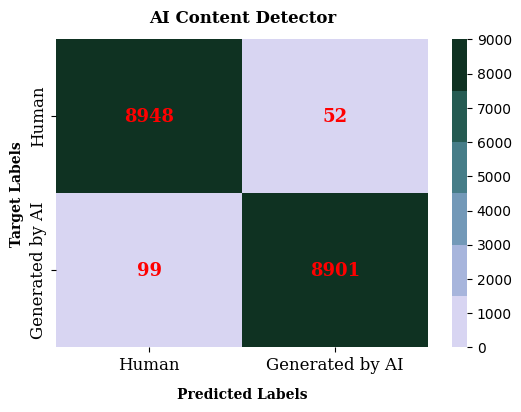

In [25]:
class_names = ['Human', 'Generated by AI']
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
# Define the custom palette
custom_palette = sns.cubehelix_palette(start=2)
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}
# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=class_names, yticklabels=class_names,vmin=0,vmax=int(xv.shape[0]/2),
                      annot_kws={"family": "Serif", 'color':'red','weight': 'bold', 'size': 13})
# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font2)
heatmap.set_ylabel('Target Labels', fontdict=font2)
heatmap.set_title('AI Content Detector', fontdict=font, pad=12)
# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)
# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space
plt.show()


In [26]:
# rete neurale "con attenzione" come secondo modello
K.clear_session()

# Implementazione di un blocco Transformer
# tramite estensione della classe Layer di Keras

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.5):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-8)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-8)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Implementazione del blocco Embedding
# per l'utilizzo di vettori posizionali
# insieme ai vettori di token di parole
# tramite estensione della classe Layer di Keras

class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions    

In [27]:
# Implementazione di un modello di classificazione
# usando il layer custom basato sull'architettura Transformer
# creato precedentemente.
# Il layer Transformer genera un vettore per ogni
# istante temporale della sequenza di input.
# Tramite GlobalAveragePooling effettuiamo una media
# su tutti gli istanti temporali e sfruttiamo una
# rete FF per classificare gli input proposti
vocab_size = len_voc
maxlen = word_med
embed_dim = 32  # dimensioni del vettore di input
num_heads = 8  # numero di meccanismi multi-head attention
ff_dim = 16  # n° di celle dei layer FF

inputs = layers.Input(shape=(maxlen,))
x = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(ff_dim, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [28]:
# verifica architettura del modello
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 182)]             0         
                                                                 
 token_and_position_embeddin  (None, 182, 32)          1896384   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 182, 32)          34768     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_2 (Dropout)         (None, 32)                0     

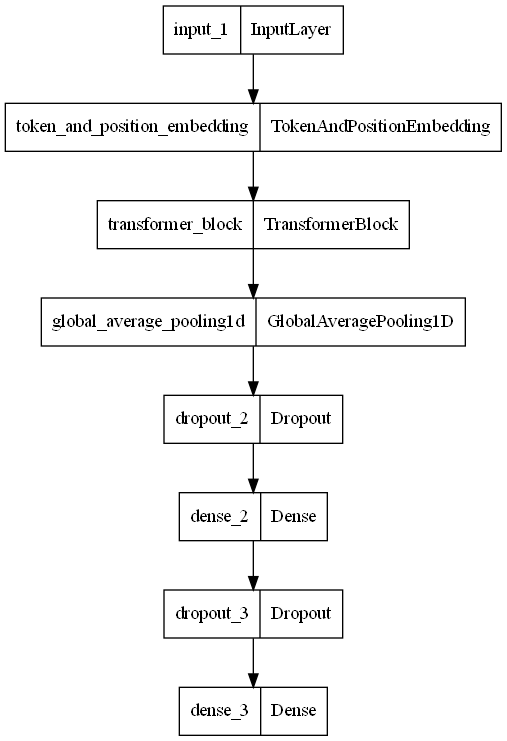

In [29]:
# diagramma dell'architettura del modello
keras.utils.plot_model(model)

In [30]:
# compilazione del modello
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = SEED, stratify = y)

vect_ = Tokenizer(num_words=len_voc, filters='')
vect_.fit_on_texts(X_train)
XV = vect_.texts_to_sequences(X_train)
xv = vect_.texts_to_sequences(X_test)
XV = pad_sequences(XV, maxlen=maxlen, padding='post')
xv = pad_sequences(xv, maxlen=maxlen, padding='post')

#vect_ = TfidfVectorizer(max_features=(maxlen))
#XV = vect_.fit_transform(X_train)
#xv = vect_.transform(X_test)
#XV = XV.toarray()
#xv = xv.toarray()


In [32]:
# addestramento
history = model.fit(
    XV,
    y_train.values,
    batch_size=512,
    epochs=10,
    validation_data=(xv, y_test.values)
)

Epoch 1/10
83/83 [==============================] - 49s 573ms/step - loss: 0.3047 - accuracy: 0.8645 - val_loss: 0.0629 - val_accuracy: 0.9792
Epoch 2/10
83/83 [==============================] - 47s 572ms/step - loss: 0.0726 - accuracy: 0.9836 - val_loss: 0.0534 - val_accuracy: 0.9870
Epoch 3/10
83/83 [==============================] - 48s 580ms/step - loss: 0.0392 - accuracy: 0.9921 - val_loss: 0.0561 - val_accuracy: 0.9871
Epoch 4/10
83/83 [==============================] - 49s 591ms/step - loss: 0.0256 - accuracy: 0.9951 - val_loss: 0.0754 - val_accuracy: 0.9840
Epoch 5/10
83/83 [==============================] - 49s 590ms/step - loss: 0.0264 - accuracy: 0.9940 - val_loss: 0.1013 - val_accuracy: 0.9812
Epoch 6/10
83/83 [==============================] - 49s 591ms/step - loss: 0.0193 - accuracy: 0.9963 - val_loss: 0.0735 - val_accuracy: 0.9872
Epoch 7/10
83/83 [==============================] - 49s 590ms/step - loss: 0.0158 - accuracy: 0.9968 - val_loss: 0.0819 - val_accuracy: 0.9853

In [33]:
y_pred = model.predict(xv)
y_pred = np.rint(y_pred)

563/563 [==============================] - 12s 20ms/step


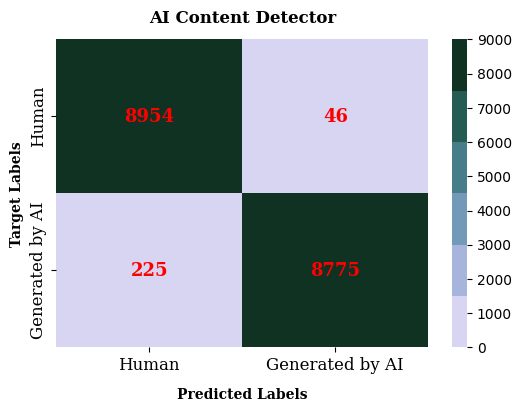

In [34]:
class_names = ['Human', 'Generated by AI']
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(6, 4))
# Define the custom palette
custom_palette = sns.cubehelix_palette(start=2)
# Define custom font dictionary for title and labels
font = {'family': 'Serif', 'weight': 'bold', 'size': 12}
font2 = {'family': 'Serif', 'weight': 'bold', 'size': 10}
# Create heatmap with annotations and colormap
heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=custom_palette,
                      xticklabels=class_names, yticklabels=class_names,vmin=0,vmax=int(xv.shape[0]/2),
                      annot_kws={"family": "Serif", 'color':'red','weight': 'bold', 'size': 13})
# Set x and y labels with the custom font dictionary
heatmap.set_xlabel('Predicted Labels', fontdict=font2)
heatmap.set_ylabel('Target Labels', fontdict=font2)
heatmap.set_title('AI Content Detector', fontdict=font, pad=12)
# Set font properties for tick labels on both axes
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)
# Create a color bar to indicate the scale
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
# Adjust padding between x-axis label and x-axis ticks
plt.gca().xaxis.labelpad = 10  # Change the value as needed to adjust the space
plt.show()